<a href="https://colab.research.google.com/github/1900690/strawberry/blob/main/eye_camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#アイカメラの動画を分析するアプリ
###〇アプリの使い方
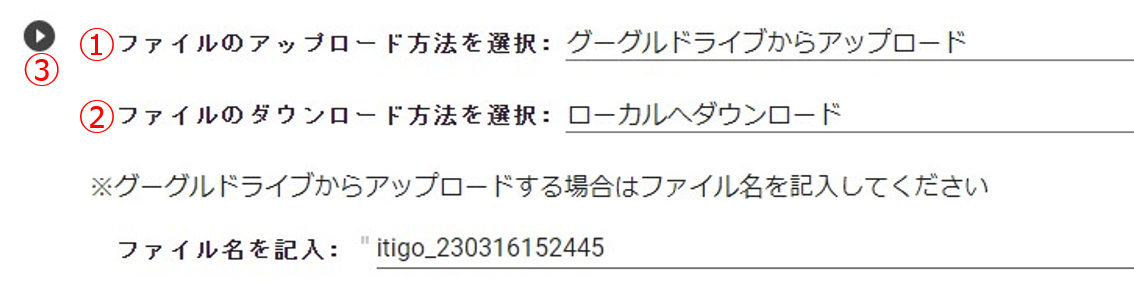

1.   ファイルのアップロード方法を選択する  
      ※動画ファイル（.mp4）と視線データ(.json)を両方アップロードしてください  
      ※ファイルサイズが大きいとアップロードに時間がかかるため、グーグルドライブ経由でアップロードすることを推奨します。
2.   ファイルのダウンロード方法を選択する  
      ※ローカルへダウンロードの場合、加工済みの動画は自動的にダウンロードされます。        
      ※ファイルサイズが大きいとダウンロードに時間がかかるため、グーグルドライブ経由でダウンロードすることを推奨します。
3.   実行ボタンを押す  
      ※ローカルからダウンロードの場合下のほうに「ファイル選択」ボタンが表示されるので、押してファイルを選択してください  
      ※加工済みの動画や画像は自動的にダウンロードされます


In [ ]:
!rm

In [33]:
#@title 〇動画に視線データを描画
#ライブラリをインポート
from pandas.core.base import doc
import shutil
import os
from google.colab import files
import pandas as pd
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

ファイルのアップロード方法を選択 = '\u30ED\u30FC\u30AB\u30EB\u304B\u3089\u30A2\u30C3\u30D7\u30ED\u30FC\u30C9' #@param ["グーグルドライブからアップロード", "ローカルからアップロード"]
ファイルのダウンロード方法を選択 = '\u30ED\u30FC\u30AB\u30EB\u3078\u30C0\u30A6\u30F3\u30ED\u30FC\u30C9' #@param ["グーグルドライブへダウンロード", "ローカルへダウンロード"]

# @markdown ※グーグルドライブからアップロードする場合はファイル名を記入してください
ファイル名を記入 = "itigo_230316152445" #@param {type:"string"}

if ファイルのアップロード方法を選択 == 'ローカルからアップロード':
  #データをアップロード
  uploaded = files.upload()

  #ファイル名を取得
  ファイル名を記入 = os.path.splitext(list(uploaded.keys())[0])[0]

if ファイルのアップロード方法を選択 == 'グーグルドライブからアップロード':
  #グーグルドライブに接続
  from google.colab import drive
  drive.mount('/content/drive')

  #グーグルドライブからcontentにコピー
  shutil.copyfile("/content/drive/MyDrive/"+ファイル名を記入+".mp4","/content/"+ファイル名を記入+".mp4")
  shutil.copyfile("/content/drive/MyDrive/"+ファイル名を記入+".json","/content/"+ファイル名を記入+".json")

#視線データを読み込み必要な部分を抽出
json_file = "/content/"+ファイル名を記入+".json"
df = pd.read_json(json_file)
df2=df["EyeData"].iloc[2]
df3 = pd.json_normalize(df2)
df6=df3[['recomValid','recomPoint.x','recomPoint.y']]

# 動画ファイルのキャプチャー
cap = cv2.VideoCapture("/content/"+ファイル名を記入+".mp4")

# 動画ファイルのフレームレート取得
fps = cap.get(cv2.CAP_PROP_FPS)

#動画のサイズを取得
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
size = (width,height)
point_size=max(width,height)

# 保存用動画ファイルのフォーマット設定
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter("/content/"+ファイル名を記入+"_eye_point.mp4", fourcc, fps, size)

# 動画を1コマずつ取り込んで処理
while(cap.isOpened()):
    ret, frame = cap.read() # キャプチャー画像の取り込み

    if ret==True: # キャプチャー画像がある場合
        # 現在時間を取得
        time = cap.get(cv2.CAP_PROP_POS_MSEC)

        # 現在のフレーム数を取得
        frame_n = cap.get(cv2.CAP_PROP_POS_FRAMES)

        # タイムコードを作成
        timecode = str(int(time//1000)).zfill(2)+':'+str(int(frame_n%fps)).zfill(2)

        # 縦横半分にリサイズ
        #resize = cv2.resize(frame, size)

        # 視点を描画
        cv2.drawMarker(frame, (int(df6.loc[int(frame_n)][1]*width),int(df6.loc[int(frame_n)][2]*height)), (0, 0, 255),cv2.MARKER_CROSS,int(point_size/10),int(point_size/100))

        # mp4動画を保存
        out.write(frame)

    else: # キャプチャー画像がない場合はループ終了
        break

cap.release() # 再生画像をクローズ
out.release() # 出力動画ファイルをクローズ
if ファイルのダウンロード方法を選択 == 'ローカルへダウンロード':
  #ダウンロード
  files.download("/content/"+ファイル名を記入+"_eye_point.mp4")

if ファイルのダウンロード方法を選択 == 'グーグルドライブへダウンロード':
  shutil.copyfile("/content/"+ファイル名を記入+"_eye_point.mp4","/content/drive/MyDrive/"+ファイル名を記入+"_eye_point.mp4")

#結果表示用
cap = cv2.VideoCapture("/content/"+ファイル名を記入+"_eye_point.mp4")
#最初のフレームを抽出
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = cap.read()
showimg=frame
cv2_imshow(showimg)

!find -name "*.json" -exec rm {} \;
!find -name "*.mp4" -exec rm {} \;
!find -name "*.jpg" -exec rm {} \;

KeyboardInterrupt: ignored

In [34]:
!find -name "*.json" --one-file-system * -exec rm {} \;
!find -name "*.mp4" --one-file-system * -exec rm {} \;
!find -name "*.jpg" --one-file-system * -exec rm {} \;

^C


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


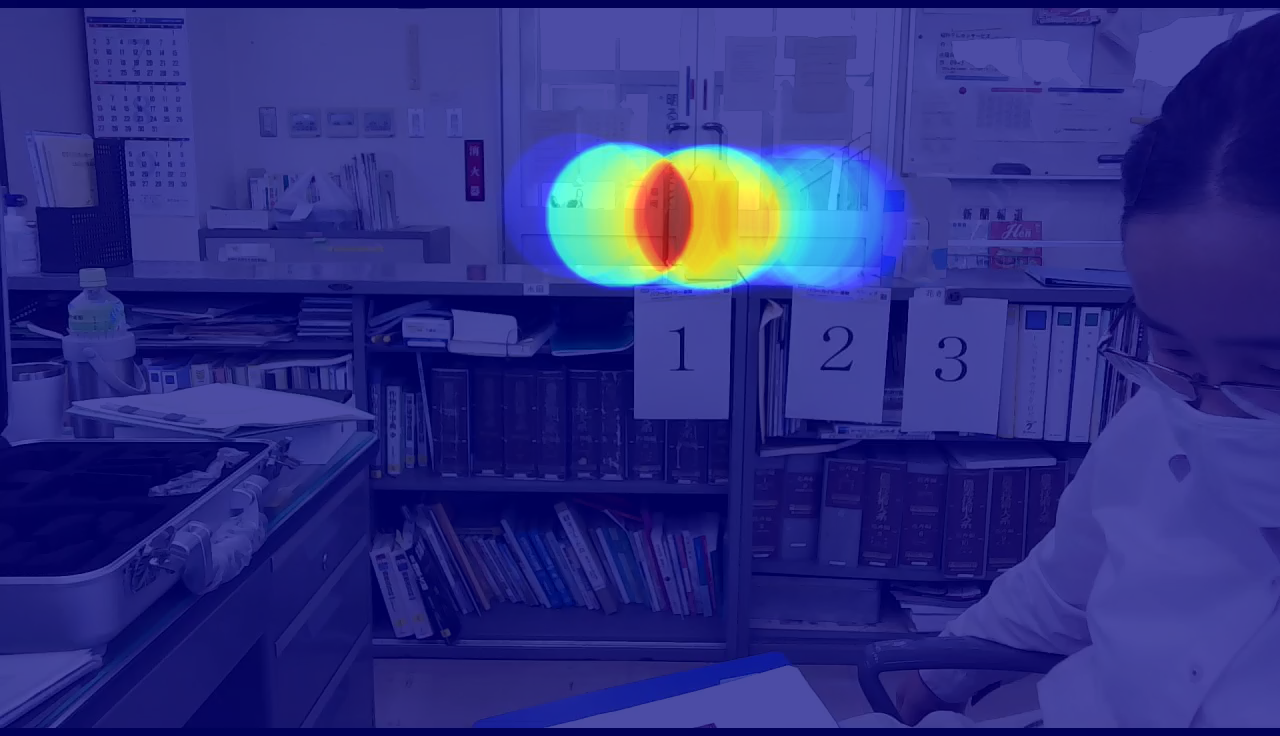

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
#@title 〇視線データのヒートマップを作成
#ライブラリをインポート
from pandas.core.base import doc
import shutil
import os
from google.colab import files
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
import shutil
import numpy as np
from google.colab.patches import cv2_imshow

ファイルのアップロード方法を選択 = '\u30B0\u30FC\u30B0\u30EB\u30C9\u30E9\u30A4\u30D6\u304B\u3089\u30A2\u30C3\u30D7\u30ED\u30FC\u30C9' #@param ["グーグルドライブからアップロード", "ローカルからアップロード"]
ファイルのダウンロード方法を選択 = '\u30ED\u30FC\u30AB\u30EB\u3078\u30C0\u30A6\u30F3\u30ED\u30FC\u30C9' #@param ["グーグルドライブへダウンロード", "ローカルへダウンロード"]

# @markdown ※グーグルドライブからアップロードする場合はファイル名を記入してください
ファイル名を記入 = "Guest_230725114056" #@param {type:"string"}

if ファイルのアップロード方法を選択 == 'ローカルからアップロード':
  #データをアップロード
  uploaded = files.upload()

  #ファイル名を取得
  ファイル名を記入 = os.path.splitext(list(uploaded.keys())[0])[0]

if ファイルのアップロード方法を選択 == 'グーグルドライブからアップロード':
  #グーグルドライブに接続
  from google.colab import drive
  drive.mount('/content/drive')

  #グーグルドライブからcontentにコピー
  shutil.copyfile("/content/drive/MyDrive/"+ファイル名を記入+".mp4","/content/"+ファイル名を記入+".mp4")
  shutil.copyfile("/content/drive/MyDrive/"+ファイル名を記入+".json","/content/"+ファイル名を記入+".json")

#視線データを読み込み必要な部分を抽出
json_file = "/content/"+ファイル名を記入+".json"
df = pd.read_json(json_file)
df2=df["EyeData"].iloc[2]
df3 = pd.json_normalize(df2)
df6=df3[['recomValid','recomPoint.x','recomPoint.y']]

# 動画ファイルのキャプチャー
cap = cv2.VideoCapture("/content/"+ファイル名を記入+".mp4")

#最初のフレームを抽出
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = cap.read()
first_frame=frame

#動画の縦横サイズとフレーム数を取得
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
size = (width,height)
gaze_point_size=min(size)//10

#初期値
ellipse=0
x, y = np.mgrid[:height,:width]

# 動画を1コマずつ取り込んで処理
while(cap.isOpened()):
    ret, frame = cap.read() # キャプチャー画像の取り込み

    if ret==True: # キャプチャー画像がある場合

        # 現在のフレーム数を取得
        frame_n = cap.get(cv2.CAP_PROP_POS_FRAMES)

        #視点の範囲を計算
        x_0, y_0 = (int(df6.loc[int(frame_n)][2]*height), int(df6.loc[int(frame_n)][1]*width)) #中央の点
        a, b = (gaze_point_size, gaze_point_size)#円の幅
        ellipse_temp = ((x - x_0)**2/a**2 + (y - y_0)**2/b**2 - 1<0).astype(np.float16)
        ellipse=ellipse+ellipse_temp

    else: # キャプチャー画像がない場合はループ終了
        break

cap.release() # 再生画像をクローズ

#ヒートマップを保存
heat=((ellipse/int(np.amax(ellipse)))*255).astype(int)
plt.imsave("/content/heat.jpg",heat, cmap="jet")

#最初のフレームと合成
dst=cv2.addWeighted(first_frame, 0.3, cv2.imread("/content/heat.jpg"), 0.7, 0)

cv2_imshow(dst)
cv2.imwrite("/content/"+ファイル名を記入+"_heatmap.jpg", dst)

if ファイルのダウンロード方法を選択 == 'ローカルへダウンロード':
  #ダウンロード
  files.download("/content/"+ファイル名を記入+"_heatmap.jpg")

if ファイルのダウンロード方法を選択 == 'グーグルドライブへダウンロード':
  shutil.copyfile("/content/"+ファイル名を記入+"_heatmap.jpg","/content/drive/MyDrive/"+ファイル名を記入+"_heatmap.jpg")